## Analyze output from train_test_random_trace_new_data
* Also mp_train_test_one_trace
* The important thing is that you have tested on one trace, multiple times (ex. test once after every episode)

In [1]:
import pandas as pd
import numpy as np
from plot_cdf import plot_cdf, plot_cdf_multiple
import matplotlib.pyplot as plt
import json
import os
import glob

In [2]:
conf_name = f"random_traces_ghent"
#Tested on this trace
trace_path = "./new_data/logs_all_4G_Ghent_json/report_bicycle_0001.json"

In [3]:
prefix = "../output/rates_delay_loss_"
suffix = ".pickle"

pickle_path = prefix+conf_name+suffix
print(pickle_path)
l_rate = pd.read_pickle(pickle_path)
time_step = 200
print(time_step)
# REAL_NAME = pickle_path.split("/")[2].split("_")[4] + "_" + pickle_path.split("/")[2].split("_")[5]
# print(REAL_NAME)

plot_gcc = False
if plot_gcc:
    pickle_path_gcc = f"../apply_model/results_gcc/rates_delay_loss_gcc_{REAL_NAME}.pickle"
    l_rate_gcc = pd.read_pickle(pickle_path_gcc)
    trace_name = l_rate_gcc["trace_name"]
    print(trace_name)

# pickle_path_hrcc = f"../apply_model/results_hrcc/rates_delay_loss_hrcc_{REAL_NAME}.pickle"
# l_rate_hrcc = pd.read_pickle(pickle_path_gcc)

../output/rates_delay_loss_random_traces_ghent.pickle
200


In [8]:
for key in l_rate.keys():
    print(len(l_rate[key]))

10


In [5]:
def make_bandwidth_series(trace_path, step_time):
    #read bandwidth file and create series
    #index timestamps, values bandwidth
    with open(trace_path, "r") as f:
        d = json.load(f)
    df = pd.DataFrame(d["uplink"]["trace_pattern"])
    time = [0] + list(df["duration"].cumsum())
    capacities = [df["capacity"].iloc[0]] + list(df["capacity"])
    s = pd.Series(index=pd.to_datetime(time, unit="ms"), data=capacities)
    capacities = s.resample(f"{step_time}ms").bfill()
    return capacities

Trace: ./new_data/logs_all_4G_Ghent_json/report_bicycle_0001.json
../new_data/logs_all_4G_Ghent_json/report_bicycle_0001.json
1970-01-01 00:00:00.000    2102.919048
1970-01-01 00:00:00.200    2102.919048
1970-01-01 00:00:00.400    2102.919048
1970-01-01 00:00:00.600    2102.919048
1970-01-01 00:00:00.800    2102.919048
                              ...     
1970-01-01 00:08:50.000    5683.188811
1970-01-01 00:08:50.200    5683.188811
1970-01-01 00:08:50.400    5683.188811
1970-01-01 00:08:50.600    5683.188811
1970-01-01 00:08:50.800    5683.188811
Freq: 200L, Length: 2655, dtype: float64
                         bandwidth_prediction     capacity
time                                                      
1970-01-01 00:00:00.000                 10000  2102.919048
1970-01-01 00:00:00.200                202271  2102.919048
1970-01-01 00:00:00.400                355065  2102.919048
1970-01-01 00:00:00.600                446285  2102.919048
1970-01-01 00:00:00.800                383389  210

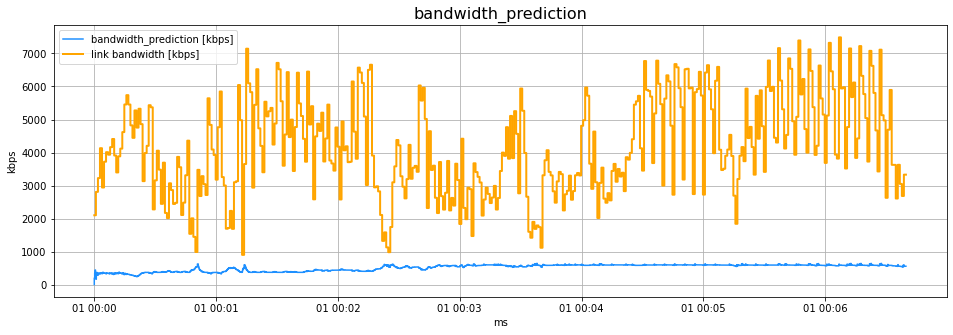

[0.         0.00069444 0.00138889 0.00208333 0.00277778 0.00347222
 0.00416667]
                         sending_rate     capacity
time                                              
1970-01-01 00:00:00.000       25040.0  2102.919048
1970-01-01 00:00:00.200       70400.0  2102.919048
1970-01-01 00:00:00.400      241040.0  2102.919048
1970-01-01 00:00:00.600      365280.0  2102.919048
1970-01-01 00:00:00.800      447680.0  2102.919048
...                               ...          ...
1970-01-01 00:06:39.000      566480.0  3331.800200
1970-01-01 00:06:39.200      582800.0  3331.800200
1970-01-01 00:06:39.400      559440.0  3331.800200
1970-01-01 00:06:39.600      560080.0  3331.800200
1970-01-01 00:06:39.800      561040.0  3331.800200

[2000 rows x 2 columns]


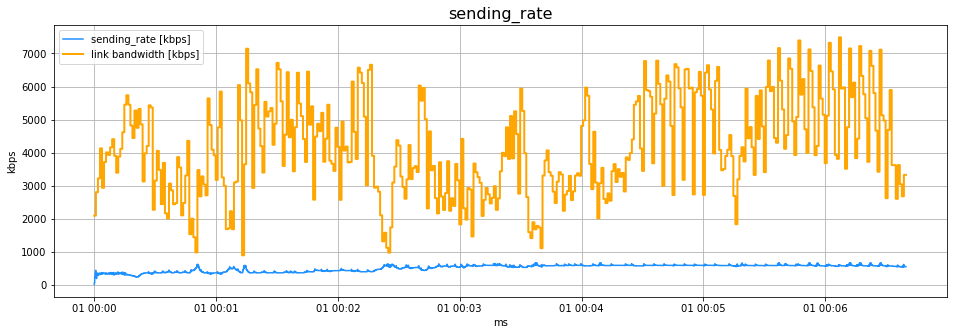

[0.         0.00069444 0.00138889 0.00208333 0.00277778 0.00347222
 0.00416667]
                         receiving_rate     capacity
time                                                
1970-01-01 00:00:00.000         25040.0  2102.919048
1970-01-01 00:00:00.200         70400.0  2102.919048
1970-01-01 00:00:00.400        241040.0  2102.919048
1970-01-01 00:00:00.600        365280.0  2102.919048
1970-01-01 00:00:00.800        447680.0  2102.919048
...                                 ...          ...
1970-01-01 00:06:39.000        566480.0  3331.800200
1970-01-01 00:06:39.200        582800.0  3331.800200
1970-01-01 00:06:39.400        559440.0  3331.800200
1970-01-01 00:06:39.600        560080.0  3331.800200
1970-01-01 00:06:39.800        561040.0  3331.800200

[2000 rows x 2 columns]


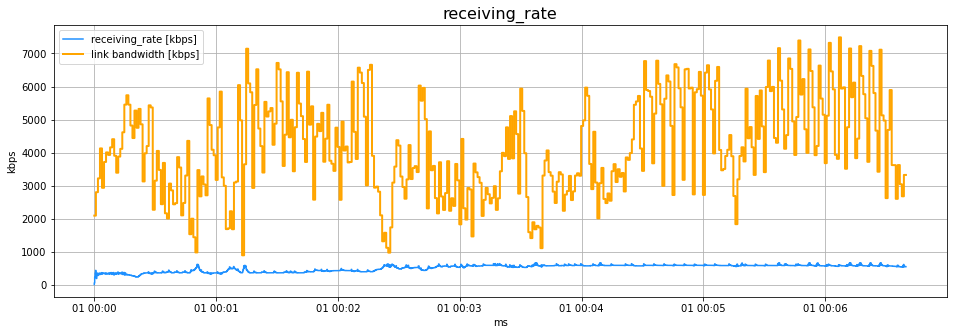

[0.         0.00069444 0.00138889 0.00208333 0.00277778 0.00347222
 0.00416667]


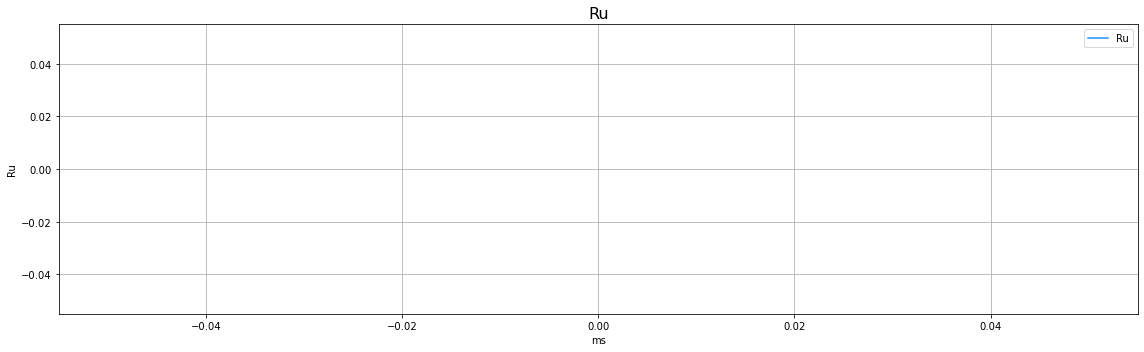

[-0.06 -0.04 -0.02  0.    0.02  0.04  0.06]


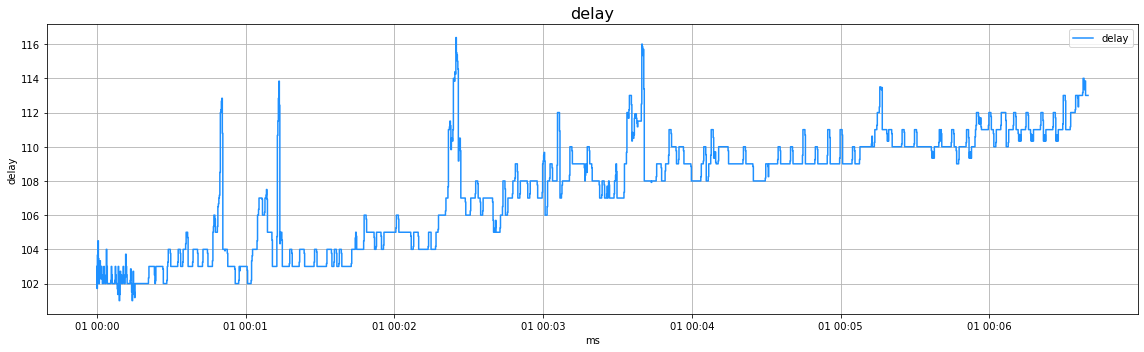

[0.         0.00069444 0.00138889 0.00208333 0.00277778 0.00347222
 0.00416667]


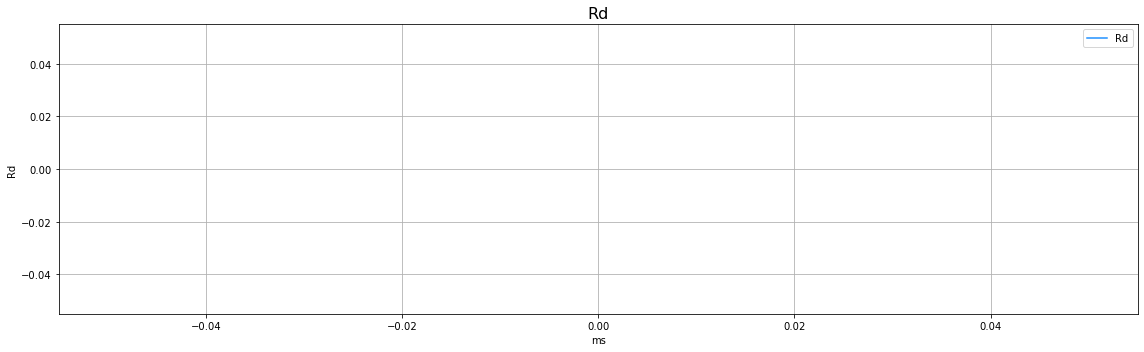

[-0.06 -0.04 -0.02  0.    0.02  0.04  0.06]


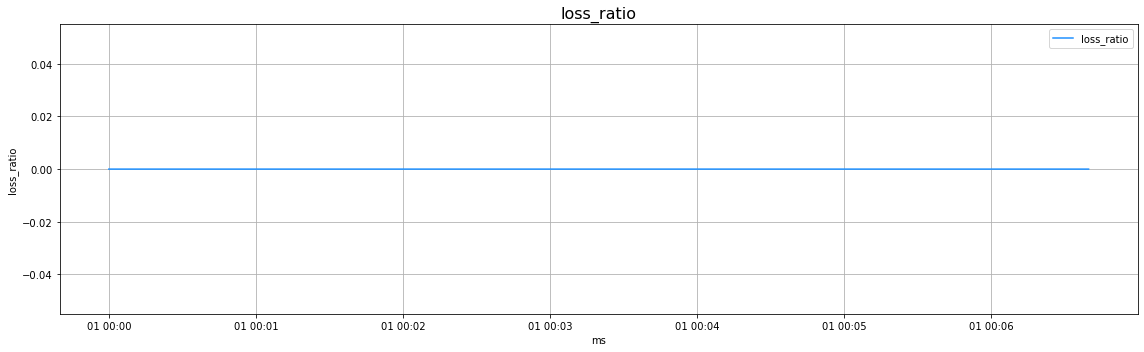

[0.         0.00069444 0.00138889 0.00208333 0.00277778 0.00347222
 0.00416667]


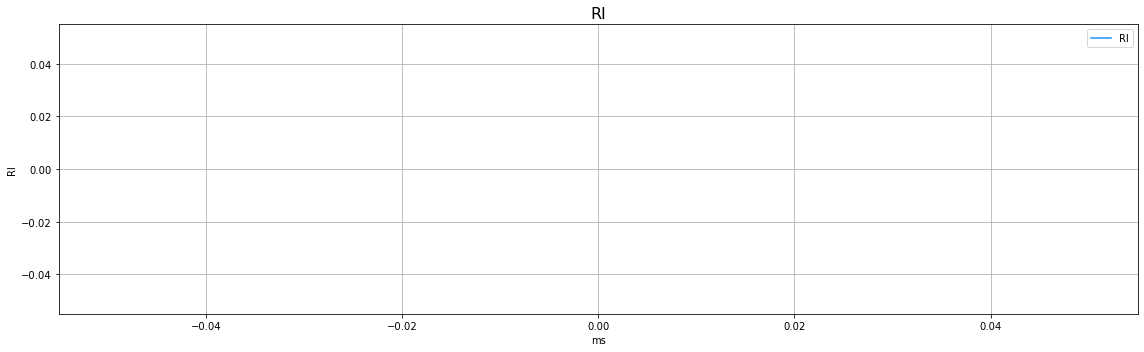

[-0.06 -0.04 -0.02  0.    0.02  0.04  0.06]


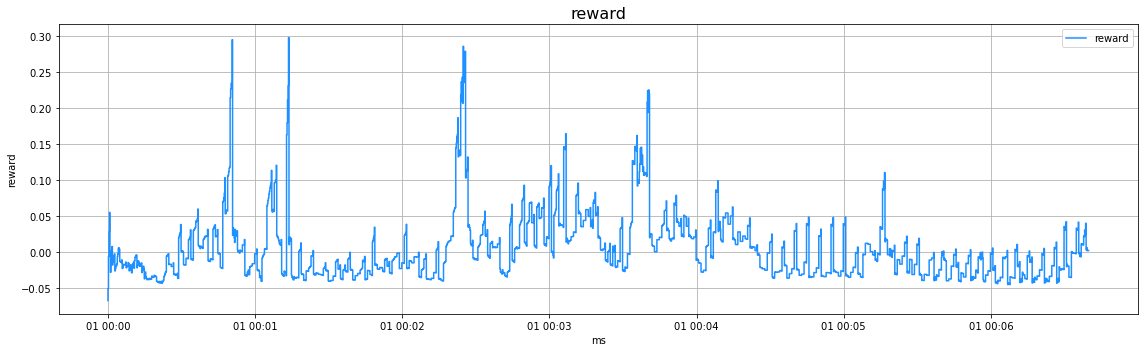

[0.         0.00069444 0.00138889 0.00208333 0.00277778 0.00347222
 0.00416667]


In [12]:
m = 9
plot_gcc = False
plot_hrcc = False

for key in l_rate.keys():
    
    print(f"Trace: {key}")
    colors = iter(["dodgerblue", "teal", "indianred", "olive", "yellow", "green"])
    
    #Define capacity
    trace_path = "../" + os.path.join(key.split("/")[1], key.split("/")[2], key.split("/")[3])
    print(trace_path)
    capacities = make_bandwidth_series(trace_path, time_step)
    print(capacities)

    # for metric in ["bandwidth_prediction", "receiving_rate", "sending_rate", "delay", "loss_ratio", "reward"]:
    for metric in ["bandwidth_prediction", "sending_rate", "receiving_rate", "Ru", "delay", "Rd", "loss_ratio", "Rl", "reward"]: #reward

        df_rate = pd.DataFrame(l_rate[key][m][metric], columns=[metric])
        if plot_gcc and (metric != "reward"):
            df_rate_gcc = pd.DataFrame(l_rate_gcc[metric], columns=[metric])
            df_rate = df_rate.join(df_rate_gcc, rsuffix="_gcc")
        if plot_hrcc and (metric != "reward"):
            df_rate_hrcc = pd.DataFrame(l_rate_hrcc[metric], columns=[metric])
            df_rate = df_rate.join(df_rate_hrcc, rsuffix="_hrcc")

        t = np.arange(len(df_rate))*time_step
        df_rate["time"] = pd.to_datetime(t, unit="ms")
        df_rate.set_index("time", inplace=True)
        
        df = df_rate.join(pd.DataFrame(capacities, columns=["capacity"]))

        if metric in ["bandwidth_prediction", "sending_rate", "receiving_rate"]:

            fig, ax = plt.subplots(figsize=(16,5))
            plt.title(metric, fontsize=16)
            # color=next(colors)
            plt.step(df.index, df[metric]/1000, label=f"{metric} [kbps]", color="dodgerblue")
            print(df)
            if plot_gcc and (metric != "reward"):
                plt.step(df.index, df[f"{metric}_gcc"]/1000, label=f"{metric} GCC [kbps]", color="red")

            plt.step(df.index, df["capacity"], lw=2, label="link bandwidth [kbps]", color="orange")
            
            plt.legend()
            plt.ylabel("kbps")
            plt.xlabel("ms")
            plt.grid()


        else:
            fig, ax = plt.subplots(figsize=(16,5))
            plt.title(metric, fontsize=16)
            plt.step(df.index, df[metric], label=f"{metric}", color="dodgerblue")
            if plot_gcc and (metric != "reward"):
                plt.step(df.index, df[f"{metric}_gcc"], label=f"{metric} GCC", color="red")
            plt.ylabel(metric)
            plt.xlabel("ms")
            plt.legend()
            plt.grid()

            plt.tight_layout()
            
        plt.show()
        print(ax.get_xticks())


In [14]:
df

,reward,capacity
time,,
1970-01-01 00:00:00.000,-0.067475,2102.919048
1970-01-01 00:00:00.200,-0.050765,2102.919048
1970-01-01 00:00:00.400,-0.006085,2102.919048
1970-01-01 00:00:00.600,0.028061,2102.919048
1970-01-01 00:00:00.800,0.054927,2102.919048
...,...,...
1970-01-01 00:06:39.000,0.003118,3331.800200
1970-01-01 00:06:39.200,0.006131,3331.800200
1970-01-01 00:06:39.400,0.001818,3331.800200
